In [3]:
import os
import random
import numpy as np
import pandas as pd
from scipy.stats import genextreme
import joblib
import matplotlib.pyplot as plt
from scipy.stats import burr
import seaborn as sns
#From pdf page 3.3.4.1. We generate data from a Weibull distribution
# location parameter (loc) = b
# scale parameter (scale) = a
# shape parameter (c) = k
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'preparation'

random.seed(42)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


In [ ]:
######### taken from config.py #########
k_set = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
a_set = [27, 27.555555555555557, 30.333333333333332, 35.333333333333336, 40.333333333333336, 45.333333333333336] 
b_set = [10, 13.88888888888889, 17.77777777777778, 21.666666666666668, 25.555555555555557, 28.333333333333332]


In [5]:
#set1, set2, set3, set4
k_set = [0.1, 0.5, 0.8, 1.2]
a_set = [27, 28.579, 35.421, 45.421] 
b_set = [10, 15.789, 21.579, 28.421]

In [105]:
num_rows = 1500
data = {}
for i, (k, a, b) in enumerate(zip(k_set, a_set, b_set), start=1):
   generated_data = genextreme.rvs(c=k, loc=b, scale=a, size=num_rows)
   data[f'set{i}'] = generated_data
data['set0'] = 0
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'preparation'
df.to_csv(FOLDER+ '/' + 'gev_config3.csv', index=False)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


In [6]:
#generate the data for the time series analysis
#600 time steps with setting 1 and then divergent to setting 2, 3, 4
num_rows = 1200
data = {}
for i, (k, a, b) in enumerate(zip(k_set, a_set, b_set), start=1):
   #first 600 time steps
   generated_data = genextreme.rvs(c=0.1, loc=10, scale=27, size=600)
   generated_data2 = genextreme.rvs(c=k, loc=b, scale=a, size=1500)
   #stack the data
   final_data = np.hstack((generated_data, generated_data2))
   data[f'set{i}'] = final_data
data['set0'] = 0

df = pd.DataFrame(data)

ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'preparation'
df.to_csv(FOLDER+ '/' + 'gev_config4.csv', index=False)

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


-----

/Users/matteovalle/Documents/GitHub/vallematteo.github.io/vallematteo.github.io/flood_credit_risk_abm


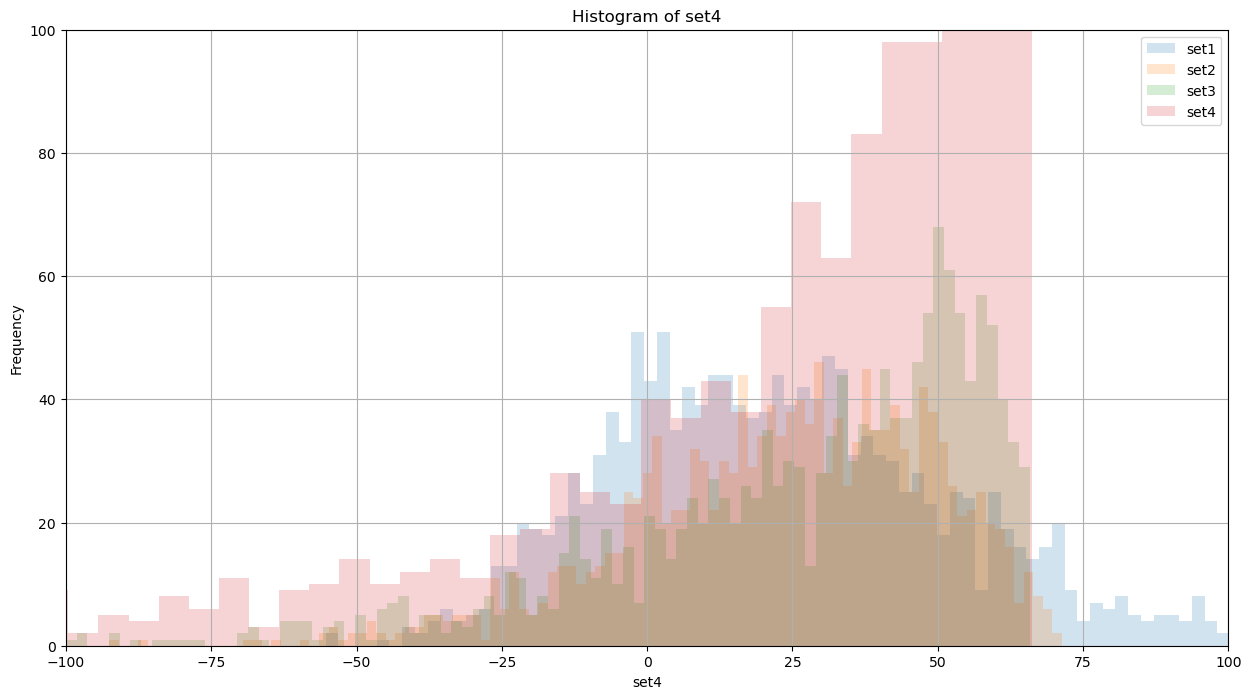

In [5]:
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
FOLDER = ROOT_DIR + '/' + 'preparation'
df = pd.read_csv(FOLDER+ '/' + 'gev_config3.csv')
df.drop('set0', axis=1, inplace=True)
plt.figure(figsize=(15, 8))
for col in df.columns:
   #print(col)
   #print(df[col].describe())
   
   # Plot the histogram with transparency and x-axis limits
   
   df[col].plot(kind='hist', bins=100, alpha=0.2)
plt.xlim(-100, 100)
plt.ylim(0, 100)
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.legend(df.columns)
plt.grid(True)
plt.show()

In [ ]:
ing_samples = ing_kde.sample(1000)
nvm_samples = nvm_kde.sample(1000)

# Plot the distributions of the samples
plt.figure(figsize=(12, 6))

# Plot for ing_kde samples
plt.subplot(1, 2, 1)
plt.hist(ing_samples, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of ing_kde Samples')
plt.xlabel('Value')
plt.ylabel('Density')

# Plot for nvm_kde samples
plt.subplot(1, 2, 2)
plt.hist(nvm_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of nvm_kde Samples')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [10]:
paths = ['kde_model_3d.joblib', 'kde_model_nvm.joblib']
ing_kde = joblib.load(FOLDER + '/' + paths[0])
nvm_kde = joblib.load(FOLDER + '/' + paths[1])

/Users/matteovalle/anaconda3/envs/Norma/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KernelDensity from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [15]:
#from model.py line 169 SHOULD OUTPUT 3 VALUES
# income, job_since, ratio cap respectively
#income, seniority, r_cap = ing_kde.sample(1)[0]
ing_kde.sample(1)[0]

array([225.17941813, 257.7539887 ])

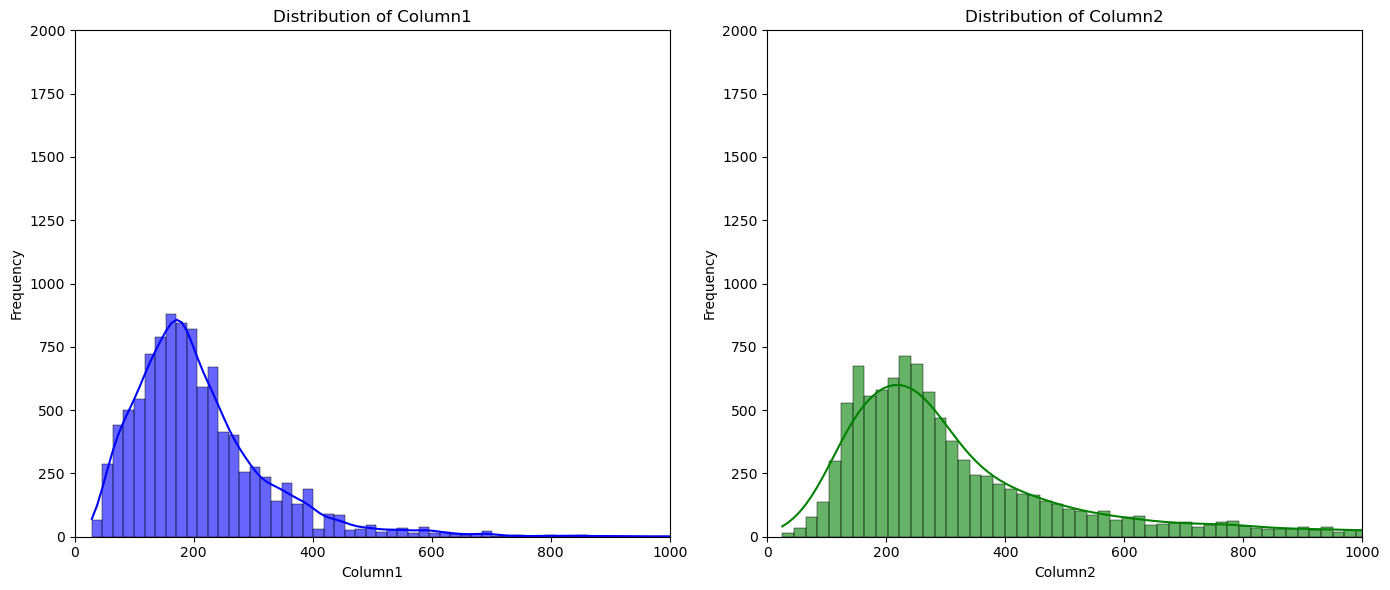

In [26]:
samples = nvm_kde.sample(10000)

# Convert to DataFrame
df_samples = pd.DataFrame(samples, columns=['Column1', 'Column2'])

# Plot the distribution of the two columns
plt.figure(figsize=(14, 6))

# Plot for Column1
plt.subplot(1, 2, 1)
sns.histplot(df_samples['Column1'], kde=True, bins=100, color='blue', alpha=0.6)
plt.title('Distribution of Column1')
plt.xlabel('Column1')
plt.ylabel('Frequency')
plt.ylim(0, 2000)
plt.xlim(0,1000)

# Plot for Column2
plt.subplot(1, 2, 2)
sns.histplot(df_samples['Column2'], kde=True, bins=100, color='green', alpha=0.6)
plt.title('Distribution of Column2')
plt.xlabel('Column2')
plt.ylabel('Frequency')
plt.ylim(0, 2000)
plt.xlim(0,1000)


plt.tight_layout()
plt.show()

In [17]:
samples = nvm_kde.sample(5)
print(samples)

[[ 262.84018445 1284.87799194]
 [ 122.56051706  154.8447644 ]
 [ 112.3624019   272.65095983]
 [ 294.50316094  374.98770714]
 [ 219.93768944 1469.24288733]]


In [34]:
print(ing_kde.sample(1)[0])

[3854.99784154  358.8207936 ]


In [93]:
from scipy.stats import burr
income = burr.rvs(c=3.30, d=0.45, loc=-12.76, scale=3101.46)
income

1351.635978371731

In [29]:
for i in range(10):
   print(burr.rvs(c=3.30, d=0.45, loc=-12.76, scale=3101.46))
#r_cap = burr.rvs(c=9.42, d=0.14, loc=-0.11, scale=73.40)

2323.526914288243
870.1648533441072
2898.970540045875
813.9020955891896
2201.3029142121245
2839.4410538208513
2494.623151638186
5879.627792978039
2090.914665537752
2936.0999985765216


----

In [1]:
from PIL import Image
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
# read maps
FOLDER = ROOT_DIR + '/' + 'preparation'
paths = ['grote.png', 'middel.png', 'kleine.png', 'extreme_kleine.png', 'nvm_cleaned.png']

def read_map(FOLDER, path):
   path = FOLDER + '/' + path
   map = Image.open(path)
   map = np.array(map.convert("L")) # convert to grayscale
   for i in range(map.shape[0]): # invert the color
      for j in range(map.shape[1]):
         map[i][j] = 255-map[i][j]
   # normalization
   return map / np.max(map)


m_fgrote = read_map(FOLDER, paths[0])
m_fmiddel = read_map(FOLDER, paths[1])
m_fklein = read_map(FOLDER, paths[2])
m_feklein = read_map(FOLDER, paths[3])
nvm = read_map(FOLDER, paths[4])

# create a binary map to restrict location of new joiner
binary_map = np.zeros(nvm.shape)
print(binary_map.shape)
for i in range(nvm.shape[0]):
    for j in range(nvm.shape[1]):
        if nvm[i, j] != 0:
            binary_map[i, j] = 1


# Example usage
width = nvm.shape[0]
height = nvm.shape[1]

print(f'width: {width}, height: {height}')


NameError: name 'os' is not defined